In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.animation import FuncAnimation
from scipy import stats

### First version

In [26]:
plt.style.use('seaborn-darkgrid')

C:\Users\USER\AppData\Local\Temp\ipykernel_11792\448178554.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


NameError: name 'anim' is not defined

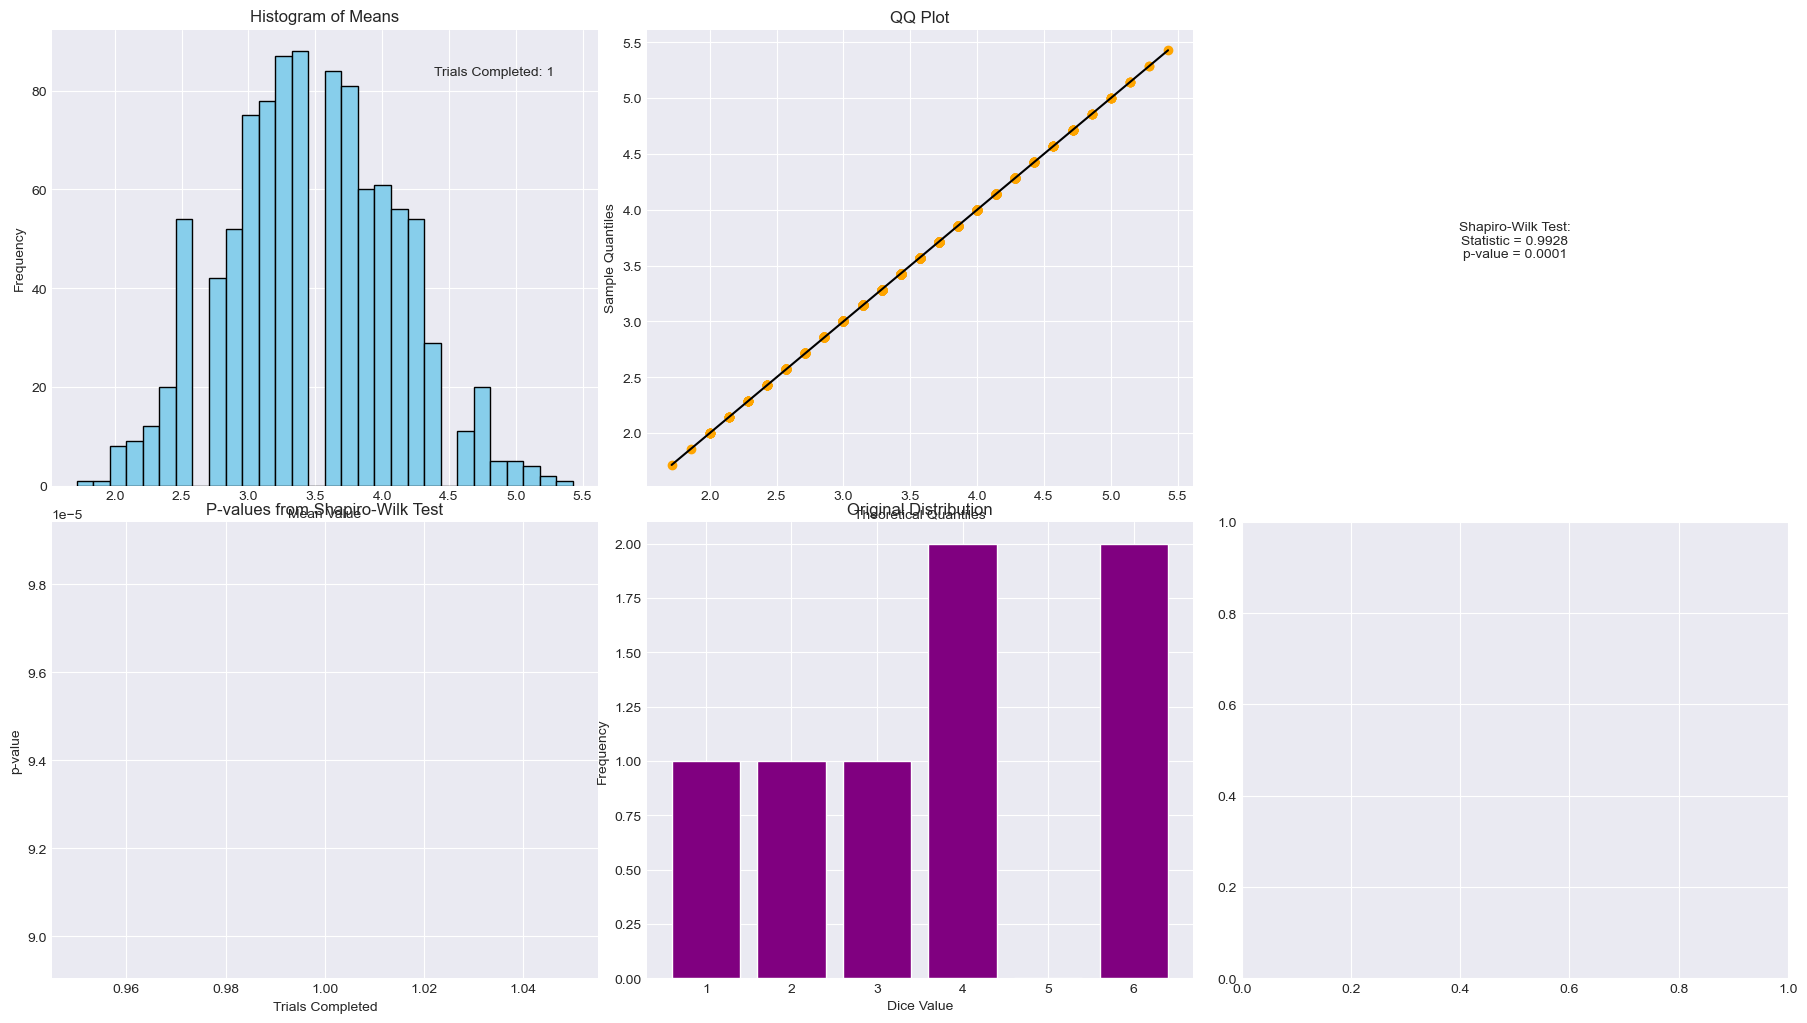

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

trials_completed = 0
means = []
p_values = []
x = np.arange(1, 7)

# Function to simulate rolling a fair six-sided dice n times
def roll_dice(n):
    return np.random.randint(1, 7, size=n)

# Function to calculate the mean of each trial
def calculate_trial_means(trials, rolls_per_trial):
    return np.mean(np.random.randint(1, 7, size=(trials, rolls_per_trial)), axis=1)

# Function to update the plot in each animation frame
def update(frame):
    global trials_completed, means, p_values
    
    # Generate new trial means and update variables
    trial_means = calculate_trial_means(1000, 7)
    trials_completed += 1
    means.extend(trial_means)
    
    # Histogram
    axs[0, 0].cla()
    axs[0, 0].hist(means, bins=30, color='skyblue', edgecolor='black')
    axs[0, 0].set_title('Histogram of Means')
    axs[0, 0].set_xlabel('Mean Value')
    axs[0, 0].set_ylabel('Frequency')
    axs[0, 0].annotate('Trials Completed: {}'.format(trials_completed), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
    
    # QQ plot
    axs[0, 1].cla()
    sorted_means = np.sort(means)
    theoretical_quantiles = np.percentile(sorted_means, np.linspace(0, 100, len(sorted_means)))
    axs[0, 1].plot(theoretical_quantiles, sorted_means, marker='o', linestyle='', color='orange')
    axs[0, 1].plot([np.min(means), np.max(means)], [np.min(means), np.max(means)], linestyle='-', color='black')
    axs[0, 1].set_title('QQ Plot')
    axs[0, 1].set_xlabel('Theoretical Quantiles')
    axs[0, 1].set_ylabel('Sample Quantiles')
    
    # Shapiro-Wilk Test
    axs[0, 2].cla()
    stat, p_value = stats.shapiro(means)
    axs[0, 2].text(0.5, 0.5, 'Shapiro-Wilk Test:\nStatistic = {:.4f}\np-value = {:.4f}'.format(stat, p_value), 
                   fontsize=10, ha='center')
    axs[0, 2].axis('off')
    
    # p-values chart
    p_values.append(p_value)
    axs[1, 0].cla()
    axs[1, 0].plot(range(1, trials_completed + 1), p_values, color='green')
    axs[1, 0].set_title('P-values from Shapiro-Wilk Test')
    axs[1, 0].set_xlabel('Trials Completed')
    axs[1, 0].set_ylabel('p-value')
    
    # Original distribution
    axs[1, 1].cla()
    original_counts, _ = np.histogram(roll_dice(7), bins=np.arange(1, 8))
    axs[1, 1].bar(x, original_counts, color='purple')
    axs[1, 1].set_title('Original Distribution')
    axs[1, 1].set_xlabel('Dice Value')
    axs[1, 1].set_ylabel('Frequency')

# Animation
ani = FuncAnimation(fig, update, frames=100, interval=500)

plt.tight_layout()
anim.save()
plt.show()

### Second version

NameError: name 'anim' is not defined

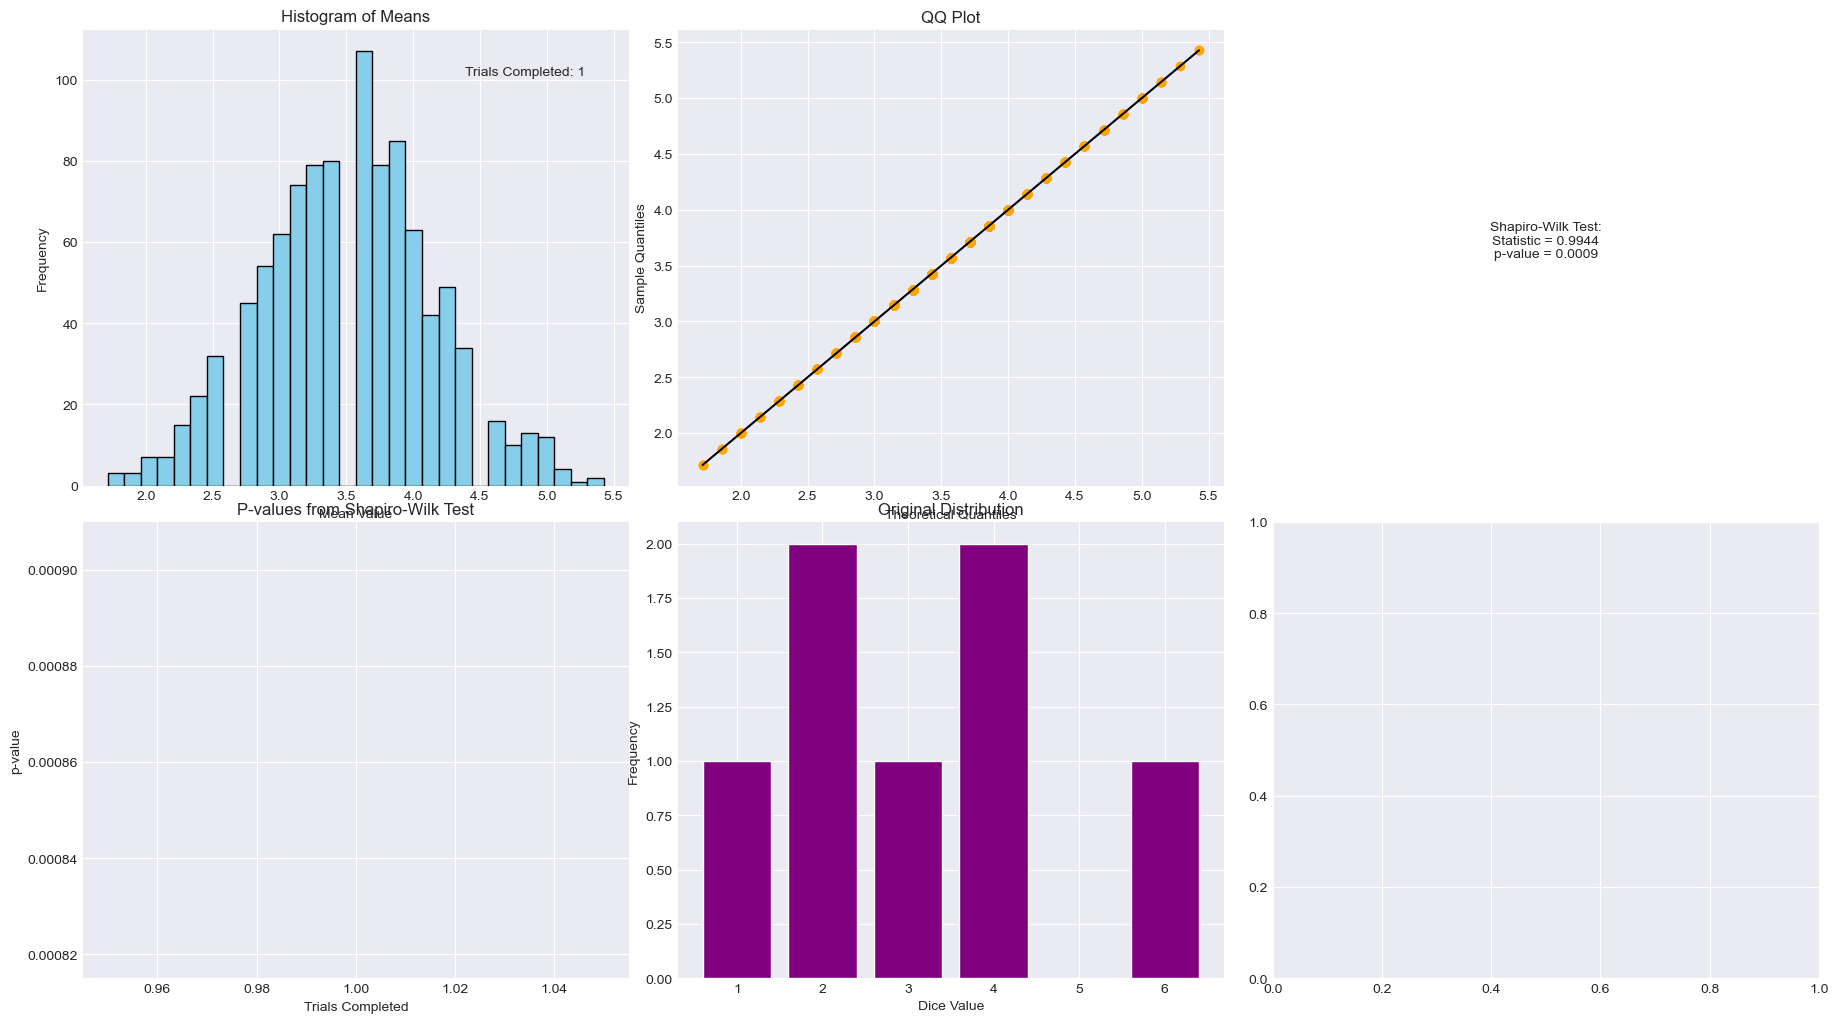

In [32]:
sns.set_style('darkgrid')

fig, axs = plt.subplots(2, 3, figsize=(18, 10))

trials_completed = 0
means = []
p_values = []
x = np.arange(1, 7)

# Function to simulate rolling a fair six-sided dice n times
def roll_dice(n):
    return np.random.randint(1, 7, size=n)

# Function to calculate the mean of each trial
def calculate_trial_means(trials, rolls_per_trial):
    return np.mean(np.random.randint(1, 7, size=(trials, rolls_per_trial)), axis=1)

# Function to update the plot in each animation frame
def update(frame):
    global trials_completed, means, p_values
    
    # Generate new trial means and update variables
    trial_means = calculate_trial_means(1000, 7)
    trials_completed += 1
    means.extend(trial_means)
    
    # Histogram
    axs[0, 0].cla()
    axs[0, 0].hist(means, bins=30, color='skyblue', edgecolor='black')
    axs[0, 0].set_title('Histogram of Means')
    axs[0, 0].set_xlabel('Mean Value')
    axs[0, 0].set_ylabel('Frequency')
    axs[0, 0].annotate('Trials Completed: {}'.format(trials_completed), xy=(0.7, 0.9), xycoords='axes fraction', fontsize=10)
    
    # QQ plot
    axs[0, 1].cla()
    sorted_means = np.sort(means)
    theoretical_quantiles = np.percentile(sorted_means, np.linspace(0, 100, len(sorted_means)))
    axs[0, 1].plot(theoretical_quantiles, sorted_means, marker='o', linestyle='', color='orange')
    axs[0, 1].plot([np.min(means), np.max(means)], [np.min(means), np.max(means)], linestyle='-', color='black')
    axs[0, 1].set_title('QQ Plot')
    axs[0, 1].set_xlabel('Theoretical Quantiles')
    axs[0, 1].set_ylabel('Sample Quantiles')
    
    # Shapiro-Wilk Test
    axs[0, 2].cla()
    stat, p_value = stats.shapiro(means)
    axs[0, 2].text(0.5, 0.5, 'Shapiro-Wilk Test:\nStatistic = {:.4f}\np-value = {:.4f}'.format(stat, p_value), 
                   fontsize=10, ha='center')
    axs[0, 2].axis('off')
    
    # p-values chart
    p_values.append(p_value)
    axs[1, 0].cla()
    axs[1, 0].plot(range(1, trials_completed + 1), p_values, color='green')
    axs[1, 0].set_title('P-values from Shapiro-Wilk Test')
    axs[1, 0].set_xlabel('Trials Completed')
    axs[1, 0].set_ylabel('p-value')
    
    # Original distribution
    axs[1, 1].cla()
    original_counts, _ = np.histogram(roll_dice(7), bins=np.arange(1, 8))
    axs[1, 1].bar(x, original_counts, color='purple')
    axs[1, 1].set_title('Original Distribution')
    axs[1, 1].set_xlabel('Dice Value')
    axs[1, 1].set_ylabel('Frequency')

# animation
ani = FuncAnimation(fig, update, frames=100, interval=500)

plt.tight_layout()
anim.save()
plt.show()
